In [1]:
import pandas as pd
import numpy as np
import statsmodels as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:.3f}'.format

In [2]:
raw_data = pd.read_excel (r'raw_data.xlsx')

# Análisis Exploratorio

#### Comenzamos echando un ojo a la data en crudo que tenemos. Es un dataset de 15 columnas por 197 filas. Cada columna representa una variable, las cuales tenemos que hacer una transformación previa para que los algoritmos de de Machine Learning de la librería Scikit-learn puedan interpretar estos datos.

In [3]:
raw_data


,País,Población,Densidad,%Riesgo Pobreza,Esperanza de vida,PIB p.Cap,Gasto Edu.p.Cap.,Gasto Salud p.Cap.,Índice Corrup.,Salario Medio,Emis.CO2 p.cap.,Decesos,Casos confirmados,Decesos x Mill.,Continente
0,Afganistan,37.172.386,57.000,NaN,"64,49",447€,23$,3€,16.000,NaN,"0,29",1.481,40.026,"39,84",ASIA
1,Albania,2.845.955,99.000,NaN,"78,90",4.780€,129$,168€,36.000,NaN,"1,64",439.000,16.212,"154,25",EUROPA
2,Alemania,83.166.711,233.000,"16,7%","81,00",41.350€,2.022$,4.099€,80.000,52.185€,"9,15",9.739,352.107,"117,10",EUROPA
3,Andorra,77.543,165.000,NaN,"90,00",35.975€,1.371$,1.754€,nan,NaN,NaN,59.000,3.190,"760,87",EUROPA
4,Angola,30.809.762,25.000,NaN,"60,78",2.910€,125$,47€,19.000,NaN,"0,98",228.000,7.096,"7,40",AFRICA
5,Antigua Y Barbuda,96.286,219.000,NaN,"76,89",14.164€,368$,281€,nan,NaN,"6,23",3.000,112,"31,16",AMERICA
6,Arabia Saudita,33.699.947,16.000,NaN,"75,00",21.019€,1.036$,703€,49.000,NaN,"18,63",5.127,341.062,"152,14",ASIA
7,Argelia,42.228.429,18.000,NaN,"76,69",3.485€,214$,151€,35.000,NaN,"3,94",1.827,53.777,"43,26",AFRICA
8,Argentina,44.560.000,16.000,NaN,"76,52",9.028€,797$,849€,40.000,NaN,"4,70",25.342,949.063,"568,72",AMERICA
9,Armenia,2.959.694,100.000,NaN,"76,70",3.550€,105$,48€,35.000,NaN,"1,97",1.046,59.995,"353,41",EUROPA


### De Strings a Numeric Values

#### Muchas de las columnas que tenemos, al hacer el web scraping, se han ingestado como strings. Son valores que tenemos que pasar a tipo numéricos. Abajo podemos ver el tipo de valor que tiene cada variable, debemos transformarlas a int o a float, según el caso.

In [4]:
raw_data.dtypes


País                   object
Población              object
Densidad              float64
%Riesgo Pobreza        object
Esperanza de vida      object
PIB p.Cap              object
Gasto Edu.p.Cap.       object
Gasto Salud p.Cap.     object
Índice Corrup.        float64
Salario Medio          object
Emis.CO2 p.cap.        object
Decesos               float64
Casos confirmados      object
Decesos x Mill.        object
Continente             object
dtype: object

In [5]:
raw_data['Población'] = raw_data['Población'].str.replace('\.','').astype(int)
raw_data['Esperanza de vida'] = raw_data['Esperanza de vida'].str.replace('\,','.').astype(float)
raw_data['PIB p.Cap'] = raw_data['PIB p.Cap'].str.replace('\€','')
raw_data['PIB p.Cap'] = raw_data['PIB p.Cap'].str.replace('\.','').astype(int)
raw_data['Gasto Edu.p.Cap.'] = raw_data['Gasto Edu.p.Cap.'].str.replace('\$','').str.replace('\.','')
raw_data['Gasto Edu.p.Cap.'] = raw_data['Gasto Edu.p.Cap.'].fillna(0)
raw_data['Gasto Edu.p.Cap.'] = raw_data['Gasto Edu.p.Cap.'].astype(int)
raw_data['Gasto Salud p.Cap.'] = raw_data['Gasto Salud p.Cap.'].str.replace('\€','').str.replace('\.','')
raw_data['Gasto Salud p.Cap.'] = raw_data['Gasto Salud p.Cap.'].fillna(0)
raw_data['Gasto Salud p.Cap.'] = raw_data['Gasto Salud p.Cap.'].astype(int)
raw_data['Emis.CO2 p.cap.'] = raw_data['Emis.CO2 p.cap.'].str.replace('\,','.').astype(float)
raw_data['Casos confirmados'] = raw_data['Casos confirmados'].str.replace('\.','')
raw_data['Casos confirmados'] = raw_data['Casos confirmados'].fillna(0)
raw_data['Casos confirmados'] = raw_data['Casos confirmados'].astype(float)
raw_data['Decesos x Mill.'] = raw_data['Decesos x Mill.'].str.replace('\.','').str.replace('\,','.')
raw_data['Decesos x Mill.'] = raw_data['Decesos x Mill.'].astype(float)


In [6]:
raw_data['Decesos'] = raw_data['Decesos'].round(decimals=3)
raw_data['Decesos'] = raw_data['Decesos'].fillna(0)
raw_data['Decesos'] = raw_data['Decesos'].apply("{:.3f}".format)
raw_data['Decesos'] = raw_data['Decesos'].astype(str)
raw_data['Decesos'] = raw_data['Decesos'].str.replace('\.000','')
raw_data['Decesos'] = raw_data['Decesos'].str.replace('\.','')
raw_data['Decesos'] = raw_data['Decesos'].astype(float)

In [7]:
raw_data['Densidad'] = raw_data['Densidad'].round(decimals=3)
raw_data['Densidad'] = raw_data['Densidad'].fillna(0)
raw_data['Densidad'] = raw_data['Densidad'].apply("{:.3f}".format)
raw_data['Densidad'] = raw_data['Densidad'].astype(str)
raw_data['Densidad'] = raw_data['Densidad'].str.replace('\.000','')
raw_data['Densidad'] = raw_data['Densidad'].str.replace('\.','')
raw_data['Densidad'] = raw_data['Densidad'].astype(int)

In [8]:
raw_data

,País,Población,Densidad,%Riesgo Pobreza,Esperanza de vida,PIB p.Cap,Gasto Edu.p.Cap.,Gasto Salud p.Cap.,Índice Corrup.,Salario Medio,Emis.CO2 p.cap.,Decesos,Casos confirmados,Decesos x Mill.,Continente
0,Afganistan,37172386,57,NaN,64.490,447,23,3,16.000,NaN,0.290,1481.000,40026.000,39.840,ASIA
1,Albania,2845955,99,NaN,78.900,4780,129,168,36.000,NaN,1.640,439.000,16212.000,154.250,EUROPA
2,Alemania,83166711,233,"16,7%",81.000,41350,2022,4099,80.000,52.185€,9.150,9739.000,352107.000,117.100,EUROPA
3,Andorra,77543,165,NaN,90.000,35975,1371,1754,nan,NaN,nan,59.000,3190.000,760.870,EUROPA
4,Angola,30809762,25,NaN,60.780,2910,125,47,19.000,NaN,0.980,228.000,7096.000,7.400,AFRICA
5,Antigua Y Barbuda,96286,219,NaN,76.890,14164,368,281,nan,NaN,6.230,3.000,112.000,31.160,AMERICA
6,Arabia Saudita,33699947,16,NaN,75.000,21019,1036,703,49.000,NaN,18.630,5127.000,341062.000,152.140,ASIA
7,Argelia,42228429,18,NaN,76.690,3485,214,151,35.000,NaN,3.940,1827.000,53777.000,43.260,AFRICA
8,Argentina,44560000,16,NaN,76.520,9028,797,849,40.000,NaN,4.700,25342.000,949063.000,568.720,AMERICA
9,Armenia,2959694,100,NaN,76.700,3550,105,48,35.000,NaN,1.970,1046.000,59995.000,353.410,EUROPA


#### Luego de aplicar algunas transformaciones a las distintas columnas, he logrado obtener el formato adecuado para su procesamiento. Como podéis ver las columnas "%Riesgo Pobreza" y "Salario Medio", no las he tocado por los motivos que explico mas abajo. Ya tenemos todas las columnas con el tipo de variable que necesitamos (float e int según el caso):

In [9]:
raw_data.dtypes

País                   object
Población               int32
Densidad                int32
%Riesgo Pobreza        object
Esperanza de vida     float64
PIB p.Cap               int32
Gasto Edu.p.Cap.        int32
Gasto Salud p.Cap.      int32
Índice Corrup.        float64
Salario Medio          object
Emis.CO2 p.cap.       float64
Decesos               float64
Casos confirmados     float64
Decesos x Mill.       float64
Continente             object
dtype: object

## Missing Values

#### Una de las primeras cosas que debemos tener en cuenta son los Missing Values, es decir los valores vacíos que tiene el dataset.

In [10]:
raw_data.isnull().sum()


País                    0
Población               0
Densidad                0
%Riesgo Pobreza       161
Esperanza de vida       4
PIB p.Cap               0
Gasto Edu.p.Cap.        0
Gasto Salud p.Cap.      0
Índice Corrup.         12
Salario Medio         156
Emis.CO2 p.cap.        13
Decesos                 0
Casos confirmados       0
Decesos x Mill.        14
Continente              1
dtype: int64

#### Podemos observar que la columna "%Riesgo de pobreza" tiene 161 valores vacíos (ósea que de 197 filas que tenemos, 161 se presentan nulas o vacías para esta variable), está claro que esta variable non nos servirá para el análisis. Lo mismo nos sucede con "Salario medio". Vamos a proceder a descartarlas para el análisis y tambien la última fila que indica la "Zona Euro" ya que no hace referencia a ningun pais y tiene la mayoría de sus columnas en Nan.

Los paises con menos de 100.000 habitantes tambien los descartaré por no aportar muchos datos contundentes sobre los decesos. Iré haciendo copias del dataset por si en algún momento me equivoco y tengo que retroceder.

In [11]:
data = raw_data.drop(['%Riesgo Pobreza','Salario Medio'],axis=1)
data.drop(data.tail(1).index, inplace = True) 
data = data[data.Población > 1000000]
#data = data[data.Población < 500000000]

In [12]:
data.shape

(158, 13)

In [13]:
data.isnull().sum()


País                  0
Población             0
Densidad              0
Esperanza de vida     1
PIB p.Cap             0
Gasto Edu.p.Cap.      0
Gasto Salud p.Cap.    0
Índice Corrup.        0
Emis.CO2 p.cap.       3
Decesos               0
Casos confirmados     0
Decesos x Mill.       3
Continente            0
dtype: int64

#### Vemos que las columnas que tenían muchos missing values ya no están. Los Nan que han quedado, al representar menos del 5% de la data, podríamos quitar sus filas, pero prefiero dejarlas, ya que con un debido proceso podemos utilizarlas.

#### Para poder lidiar con estos Nan, los reemplazaremos por la mediana de su correspondiente columna. ¿Porqué la mediana y no la media? Porque en la media tendríamos en cuenta los outliers si es que los hay, y afectaría al resultado final del análisis.

#### En el paso anterior tuve que reemplazar algunos NaN de varias columnas por 0, sino no me permitía transformar el tipo a 'int'. Eso también lo he contemplado en el paso siguiente, en lugar de reemplazar los nan por la mediana, reemplazaré los ceros.

In [14]:
data_without_nans = data

In [15]:
data_without_nans['Esperanza de vida'] = data_without_nans['Esperanza de vida'].fillna(data_without_nans['Esperanza de vida'].median())
data_without_nans['Gasto Edu.p.Cap.'] = data_without_nans['Gasto Edu.p.Cap.'].mask(data_without_nans['Gasto Edu.p.Cap.'] == 0, data_without_nans['Gasto Edu.p.Cap.'].median())
data_without_nans['Gasto Salud p.Cap.'] = data_without_nans['Gasto Salud p.Cap.'].mask(data_without_nans['Gasto Salud p.Cap.'] == 0, data_without_nans['Gasto Salud p.Cap.'].median())
data_without_nans['Índice Corrup.'] = data_without_nans['Índice Corrup.'].fillna(data_without_nans['Índice Corrup.'].median())
data_without_nans['Emis.CO2 p.cap.'] = data_without_nans['Emis.CO2 p.cap.'].fillna(data_without_nans['Emis.CO2 p.cap.'].median())
data_without_nans['Decesos'] = data_without_nans['Decesos'].mask(data_without_nans['Decesos'] == 0, data_without_nans['Decesos'].min())
data_without_nans['Casos confirmados'] = data_without_nans['Casos confirmados'].mask(data_without_nans['Casos confirmados'] == 0, data_without_nans['Casos confirmados'].min())
data_without_nans['Decesos x Mill.'] = data_without_nans['Decesos x Mill.'].fillna(data_without_nans['Decesos x Mill.'].median())

In [16]:
data_without_nans['Decesos'].min()

0.0

In [17]:
data_without_nans.isnull().sum()

País                  0
Población             0
Densidad              0
Esperanza de vida     0
PIB p.Cap             0
Gasto Edu.p.Cap.      0
Gasto Salud p.Cap.    0
Índice Corrup.        0
Emis.CO2 p.cap.       0
Decesos               0
Casos confirmados     0
Decesos x Mill.       0
Continente            0
dtype: int64

#### Antes de continuar me gustaría agregar dos variables dependientes interesantes que no tenemos, que es la cantidad de casos y decesos por cada 100.000 habitantes. Para eso debemos hacer lo siguiente:

In [18]:
data_without_nans['Decesos x 100K'] = (data_without_nans['Decesos'] * 100000)/data_without_nans['Población']
data_without_nans['Decesos x 100K'] = data_without_nans['Decesos x 100K'].astype(int)

In [19]:
data_without_nans['Casos x 100K'] = (data_without_nans['Casos confirmados'] * 100000)/data_without_nans['Población']
data_without_nans['Casos x 100K'] = data_without_nans['Casos x 100K'].astype(int)

In [20]:
data_without_nans['Tasa de Letalidad'] = (data_without_nans['Decesos']/data_without_nans['Casos confirmados'])*100



In [21]:
data_without_nans['Tasa de Letalidad'] = data_without_nans['Tasa de Letalidad'].fillna(data_without_nans['Tasa de Letalidad'].median())

In [22]:
data_without_nans.sort_values('Tasa de Letalidad')

,País,Población,Densidad,Esperanza de vida,PIB p.Cap,Gasto Edu.p.Cap.,Gasto Salud p.Cap.,Índice Corrup.,Emis.CO2 p.cap.,Decesos,Casos confirmados,Decesos x Mill.,Continente,Decesos x 100K,Casos x 100K,Tasa de Letalidad
122,Mongolia,3170208,2,69.690,3490,150.000,81,37.000,6.260,0.000,320.000,0.000,ASIA,0,10,0.000
32,Camboya,16249798,90,69.570,1274,33.000,17,20.000,0.670,0.000,283.000,0.000,ASIA,0,1,0.000
100,Laos,7062000,30,67.610,2173,59.000,19,29.000,0.520,0.000,23.000,0.000,ASIA,0,0,0.000
177,Timor Oriental,1267972,85,69.260,1048,51.000,49,35.000,0.220,0.000,29.000,0.000,ASIA,0,2,0.000
54,Eritrea,5068831,43,65.940,335,4.000,8,24.000,0.170,0.000,422.000,0.000,AFRICA,0,8,0.000
162,Singapur,5639000,7843,83.150,58934,1626.000,1117,85.000,9.650,28.000,57892.000,4.970,ASIA,0,1026,0.048
35,Catar,2781677,240,80.100,58250,1799.000,1179,62.000,38.190,222.000,128803.000,79.810,ASIA,7,4630,0.172
29,Burundi,11175378,402,61.250,230,14.000,5,17.000,0.030,1.000,529.000,0.090,AFRICA,0,4,0.189
165,Sri Lanka,21670000,330,76.810,3474,87.000,61,38.000,1.140,13.000,5244.000,0.600,ASIA,0,24,0.248
55,Eslovaquia,5457873,111,77.400,17270,646.000,973,50.000,6.990,71.000,24225.000,13.010,EUROPA,1,443,0.293


In [23]:
data_without_nans.to_excel(r'TasaLetalidad.xlsx', index = False)

In [24]:
# Drop Corea del Norte
data_without_nans = data_without_nans.drop(42)


In [25]:
data_without_nans = data_without_nans.drop(80)
data_without_nans = data_without_nans.drop(182)

In [26]:
data_without_nans.dtypes

País                   object
Población               int32
Densidad                int32
Esperanza de vida     float64
PIB p.Cap               int32
Gasto Edu.p.Cap.      float64
Gasto Salud p.Cap.      int64
Índice Corrup.        float64
Emis.CO2 p.cap.       float64
Decesos               float64
Casos confirmados     float64
Decesos x Mill.       float64
Continente             object
Decesos x 100K          int32
Casos x 100K            int32
Tasa de Letalidad     float64
dtype: object

In [27]:
data_without_nans.shape

(155, 16)

In [28]:
data_without_nans.to_excel("data_without_nans.xlsx", sheet_name='raw_data', index=False)

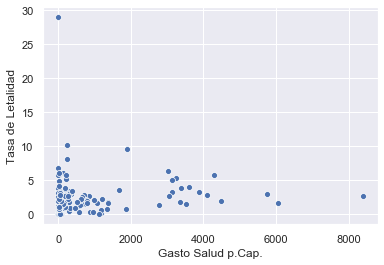

In [29]:
sns.set(color_codes=True)

ax = sns.scatterplot(data_without_nans['Gasto Salud p.Cap.'],data_without_nans['Tasa de Letalidad'])

plt.show()

## Explorando los PDF(probability distribution function) de las variables 


#### Esto nos permitirá ver como están distribuidos los datos en cada variable, de esta manera podemos detectar fácilmente anomalías, como outliers. A partir de este análisis de la distribución podemos decidir si transformar una variable o no.

In [30]:
data_without_nans.describe(include='all')


,País,Población,Densidad,Esperanza de vida,PIB p.Cap,Gasto Edu.p.Cap.,Gasto Salud p.Cap.,Índice Corrup.,Emis.CO2 p.cap.,Decesos,Casos confirmados,Decesos x Mill.,Continente,Decesos x 100K,Casos x 100K,Tasa de Letalidad
count,155,155.000,155.000,155.000,155.000,155.000,155.000,155.000,155.000,155.000,155.000,155.000,155,155.000,155.000,155.000
unique,155,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,5,nan,nan,nan
top,Libia,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,AFRICA,nan,nan,nan
freq,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,50,nan,nan,nan
mean,NaN,48540386.084,188.413,71.977,11799.935,590.355,689.658,41.561,4.649,7075.819,250569.265,140.458,NaN,13.581,610.206,2.529
std,NaN,159843459.605,656.927,7.921,16503.757,970.296,1336.161,19.102,5.928,24705.134,970198.904,212.523,NaN,21.250,848.973,2.772
min,NaN,1049000.000,2.000,52.810,230.000,2.000,2.000,10.000,0.030,0.000,23.000,0.000,NaN,0.000,0.000,0.000
25%,NaN,5156597.000,31.500,66.020,1298.000,52.000,17.500,28.000,0.655,92.500,5398.000,10.195,NaN,0.500,57.500,1.298
50%,NaN,11485048.000,78.000,74.000,4461.000,173.500,134.000,36.000,2.630,501.000,32351.000,46.440,NaN,4.000,300.000,2.006
75%,NaN,36107000.000,137.000,77.665,14574.000,613.500,642.000,52.000,6.300,2158.500,112726.000,161.055,NaN,15.500,864.500,2.991


#### Vamos a ver las variables que nos interesan en unos boxplot, y la distribución de la variable Población por ejemplo.

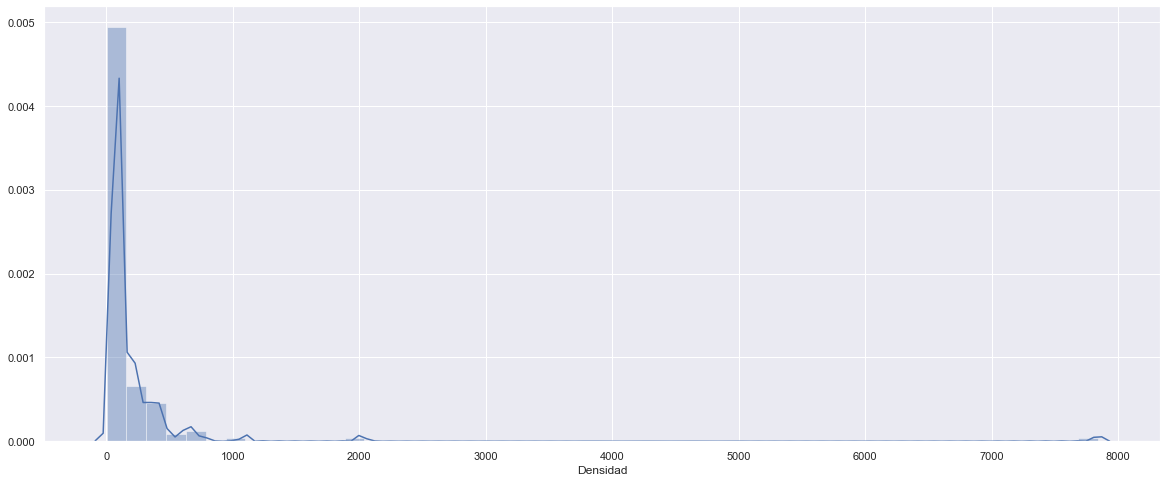

In [31]:
fig = plt.figure(figsize = (20,8))
sns.distplot(data_without_nans['Densidad'])

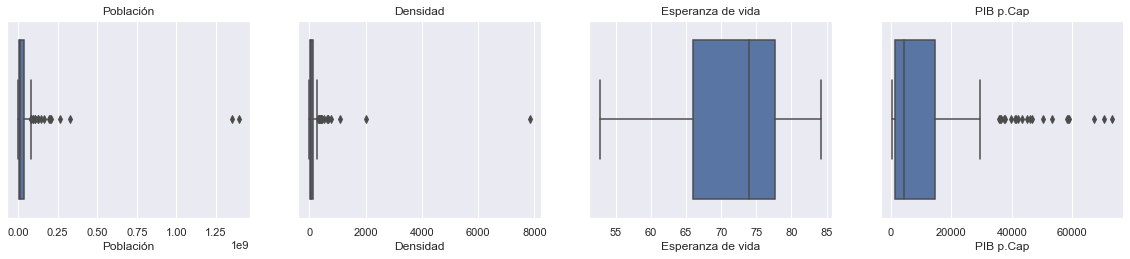

In [32]:
fig = plt.figure(figsize = (20,8))
for i in range(1,5):
    data3 = plt.subplot(2,4,i, title = data_without_nans.columns[i])
    sns.boxplot(data_without_nans[data_without_nans.columns[i]])
    

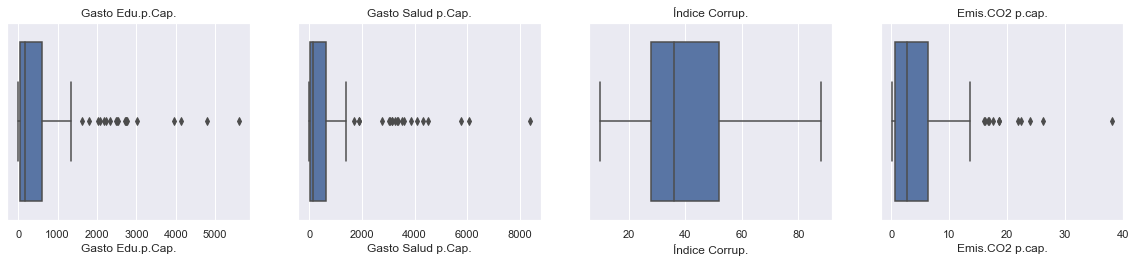

In [33]:
fig = plt.figure(figsize = (20,8))
for i in range(5,9):
    data3 = plt.subplot(2,4,i, title = data_without_nans.columns[i])
    sns.boxplot(data_without_nans[data_without_nans.columns[i]])

#### Viendo la cantidad de outliers que tenemos en cada variable, podemos llegar a la conclusión, de que no tenemos la mejor data para hacer un buen modelo de Machine Learning. Los Outliers aumentan la variabilidad de la data, lo que disminuye el poder estadístico. Consecuentemente, excluir outliers puede hacer que tus resultados sean estadísticamente significantes.

#### Para lograr una data mas homogenea podríamos quitar los outliers, pero de esta manera quizás perderíamos información valiosa de las otras variables, por lo que he decidido tratar estos outliers.

#### Una forma de tratarlos es la transformación logarítmica, esto puede ayudar a corregir la distribución de las variables. El objetivo es que se asemejen todo lo posible a una distribución normal. Como hemos visto en el histograma de la distribución de 'Población', esto no está sucediendo. Pues voy a aplicar la transformación logarítmica a la variable 'Población' a ver que pasa.


In [34]:
data_without_outliers = data_without_nans.copy()

In [35]:
data_without_outliers['Población'] = data_without_outliers['Población'] .map(lambda i: np.log(i) if i > 0 else 0) 

In [36]:
print(data_without_nans['Población'].skew())

7.5714924766220175


In [37]:
print(data_without_outliers['Población'].skew())


0.5056308813689367


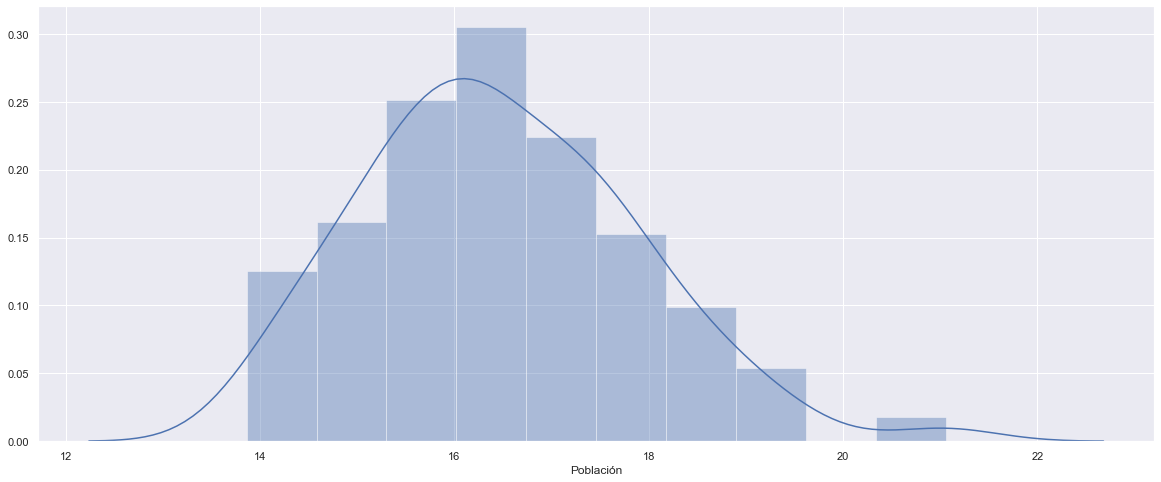

In [38]:
fig = plt.figure(figsize = (20,8))
sns.distplot(data_without_outliers['Población'])


#### Si vemos el valor de la asimetría de la variable antes de aplicar la función logaritmica es de 3.52, y luego de -0.39, lo que nos indica que la data ahora tiene menos variabilidad. 

#### He logrado obtener una distribución normal de la variable 'Poblacion'. Vamos a aplicarlo a las demás variables a ver que sucede.

In [39]:
data_without_outliers['Densidad'] = data_without_outliers['Densidad'] .map(lambda i: np.log(i) if i > 0 else 0) 
data_without_outliers['PIB p.Cap'] = data_without_outliers['PIB p.Cap'] .map(lambda i: np.log(i) if i > 0 else 0) 
data_without_outliers['Gasto Edu.p.Cap.'] = data_without_outliers['Gasto Edu.p.Cap.'] .map(lambda i: np.log(i) if i > 0 else 0) 
data_without_outliers['Gasto Salud p.Cap.'] = data_without_outliers['Gasto Salud p.Cap.'] .map(lambda i: np.log(i) if i > 0 else 0) 
data_without_outliers['Emis.CO2 p.cap.'] = data_without_outliers['Emis.CO2 p.cap.'] .map(lambda i: np.log(i) if i > 0 else 0)


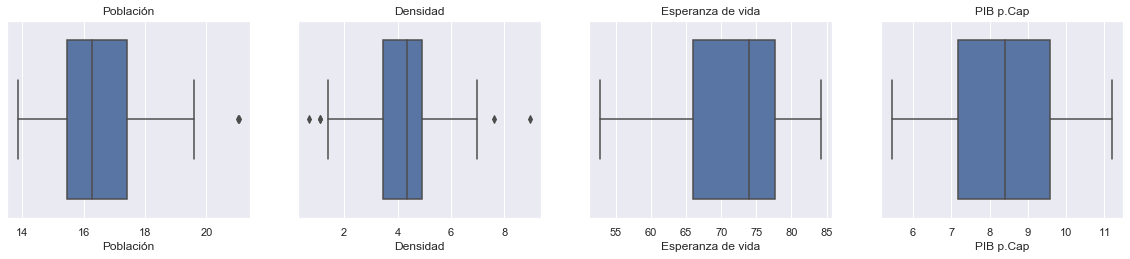

In [40]:
fig = plt.figure(figsize = (20,8))
for i in range(1,5):
    data3 = plt.subplot(2,4,i, title = data_without_outliers.columns[i])
    sns.boxplot(data_without_outliers[data_without_outliers.columns[i]])


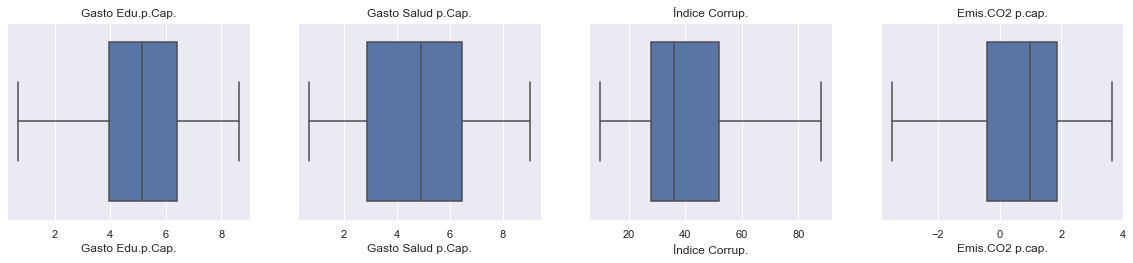

In [41]:
fig = plt.figure(figsize = (20,8))
for i in range(5,9):
    data3 = plt.subplot(2,4,i, title = data_without_outliers.columns[i])
    sns.boxplot(data_without_outliers[data_without_outliers.columns[i]])



#### Veo que pude lidiar con la mayoría de los outliers, pero en 'Densidad' y 'Gasto Edu.p. Cap' ha quedado alguno dando vueltas. Como son pocos esta vez utilizare la técnica de reemplazar los outliers por la mediana de la variable, nunca la media ya que se ve afectada por los outliers.

In [42]:
print(data_without_outliers['Densidad'].quantile(0.05)) 
print(data_without_outliers['Densidad'].quantile(0.50)) 
print(data_without_outliers['Densidad'].quantile(0.95)) 


1.9459101490553132
4.356708826689592
6.175680550567347


In [43]:
data_without_outliers2 = data_without_outliers.copy()

In [44]:
Q1 = np.percentile(data_without_outliers2['Densidad'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(data_without_outliers2['Densidad'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data_without_outliers2['Densidad'], 75, interpolation = 'midpoint')  
  
print('Q1 25 percentile of the given data is, ', Q1) 
print('Q1 50 percentile of the given data is, ', Q2) 
print('Q1 75 percentile of the given data is, ', Q3) 
  
IQR = Q3 - Q1  
print('Interquartile range is', IQR) 

Q1 25 percentile of the given data is,  3.449861553642436
Q1 50 percentile of the given data is,  4.356708826689592
Q1 75 percentile of the given data is,  4.919954285446629
Interquartile range is 1.4700927318041925


In [45]:
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
print('low_limit is', low_lim) 
print('up_limit is', up_lim) 

low_limit is 1.2447224559361474
up_limit is 7.125093383152917


In [46]:
outlier =[] 
for x in data_without_outliers2['Densidad']: 
    if x > up_lim or x < low_lim: 
         outlier.append(x) 
print(outlier) 

[1.0986122886681098, 7.6093665379542115, 0.6931471805599453, 1.0986122886681098, 8.967376693212666]


In [47]:
data_without_outliers2['Densidad'].sort_values()


122   0.693
125   1.099
10    1.099
24    1.386
105   1.386
34    1.386
118   1.386
144   1.946
95    1.946
67    2.079
151   2.197
131   2.197
22    2.303
36    2.485
133   2.639
114   2.708
146   2.708
6     2.773
64    2.773
8     2.773
139   2.833
169   2.833
132   2.890
129   2.890
7     2.890
138   2.944
187   2.996
168   3.091
194   3.135
170   3.135
164   3.178
4     3.219
37    3.219
140   3.219
25    3.219
61    3.367
102   3.401
100   3.401
97    3.434
190   3.466
60    3.497
147   3.584
195   3.611
124   3.638
107   3.761
104   3.761
54    3.761
40    3.784
193   3.807
110   3.807
20    3.807
85    3.850
75    3.850
167   3.871
128   3.912
74    3.912
76    3.951
33    3.970
69    3.970
192   3.989
137   4.007
0     4.043
175   4.078
27    4.143
176   4.159
119   4.159
166   4.174
50    4.190
23    4.220
185   4.234
101   4.234
181   4.263
86    4.263
46    4.277
28    4.277
188   4.304
159   4.357
44    4.357
21    4.369
116   4.369
158   4.394
72    4.394
150   4.394
109 

In [48]:
data_without_outliers2['Densidad'] = np.where(data_without_outliers2['Densidad'] < 1, 4.36, data_without_outliers2['Densidad'])


In [49]:
data_without_outliers2['Densidad'] = np.where(data_without_outliers2['Densidad'] > 7.15, 4.36, data_without_outliers2['Densidad'])

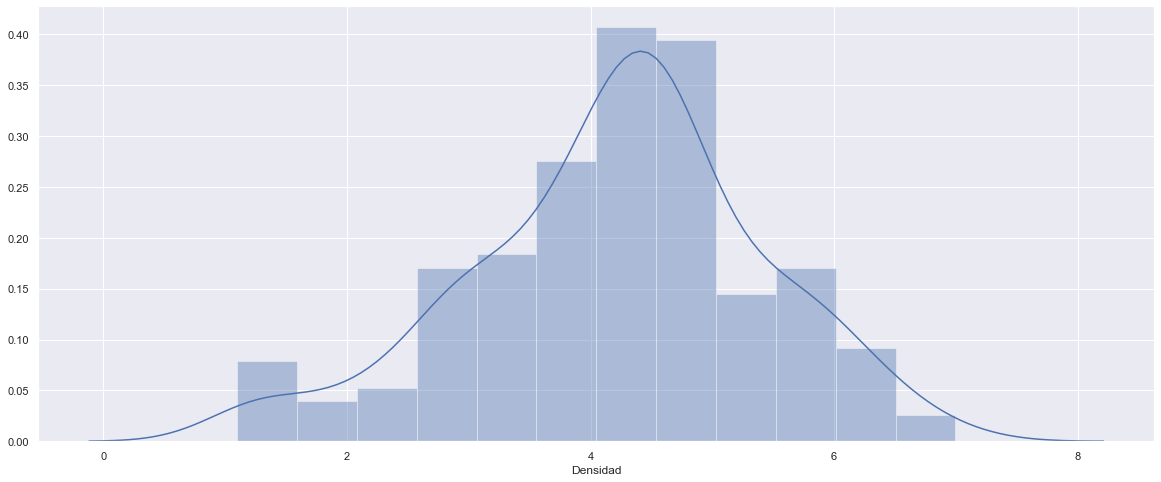

In [50]:
fig = plt.figure(figsize = (20,8))
sns.distplot(data_without_outliers2['Densidad'])

In [51]:
Q1 = np.percentile(data_without_outliers2['Población'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(data_without_outliers2['Población'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data_without_outliers2['Población'], 75, interpolation = 'midpoint')  
  
print('Q1 25 percentile of the given data is, ', Q1) 
print('Q1 50 percentile of the given data is, ', Q2) 
print('Q1 75 percentile of the given data is, ', Q3) 
  
IQR = Q3 - Q1  
print('Interquartile range is', IQR) 

Q1 25 percentile of the given data is,  15.455642560213704
Q1 50 percentile of the given data is,  16.25655657346099
Q1 75 percentile of the given data is,  17.401695478164484
Interquartile range is 1.9460529179507802


In [52]:
data_without_outliers2['Población'] = np.where(data_without_outliers2['Población'] > 20,  16.25, data_without_outliers2['Población'])

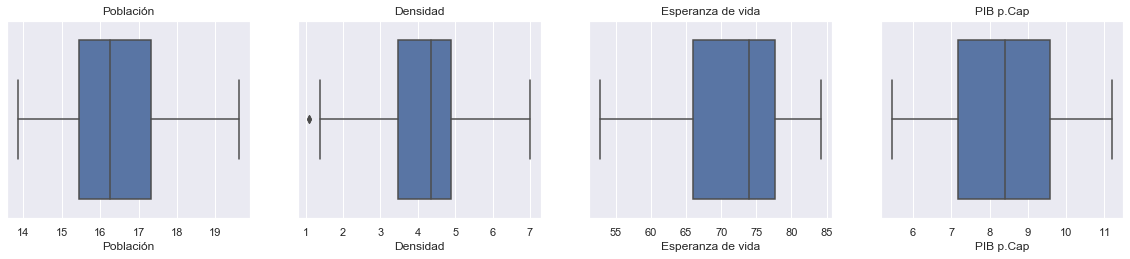

In [53]:
fig = plt.figure(figsize = (20,8))
for i in range(1,5):
    data3 = plt.subplot(2,4,i, title = data_without_outliers2.columns[i])
    sns.boxplot(data_without_outliers2[data_without_outliers2.columns[i]])

#### Podemos ver en los diagramas de cajas y bigotes de arriba como ya no tenemos outliers en ninguna de las variables. Me quedaba por tratar los outliers de la variable 'Gasto Edu.p.Cap'.



In [54]:
print(data_without_outliers['Gasto Edu.p.Cap.'].quantile(0.05)) 
print(data_without_outliers['Gasto Edu.p.Cap.'].quantile(0.50)) 
print(data_without_outliers['Gasto Edu.p.Cap.'].quantile(0.95)) 

2.7325293044524246
5.156177599386914
7.909120767455231


In [55]:
data_without_outliers3 = data_without_outliers2.copy()

In [56]:
data_without_outliers3['Gasto Edu.p.Cap.'] = np.where(data_without_outliers3['Gasto Edu.p.Cap.'] < 2.83, 5.29, data_without_outliers3['Gasto Edu.p.Cap.'])



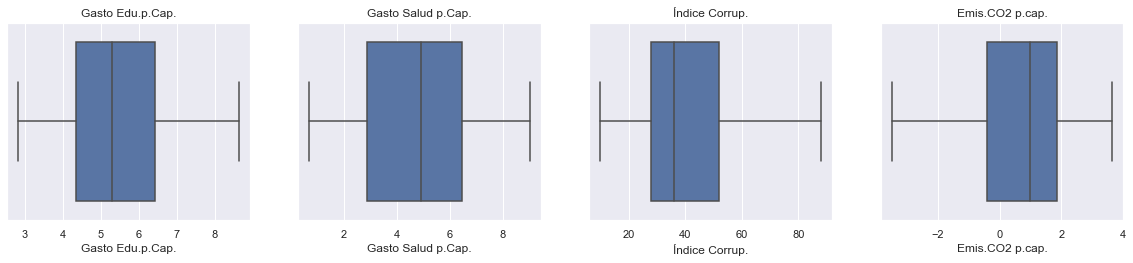

In [57]:
fig = plt.figure(figsize = (20,8))
for i in range(5,9):
    data3 = plt.subplot(2,4,i, title = data_without_outliers3.columns[i])
    sns.boxplot(data_without_outliers3[data_without_outliers3.columns[i]])

In [58]:
Q1_TasaNatalidad = np.percentile(data_without_outliers2['Tasa de Letalidad'], 25, interpolation = 'midpoint')  
Q2_TasaNatalidad = np.percentile(data_without_outliers2['Tasa de Letalidad'], 50, interpolation = 'midpoint')  
Q3_TasaNatalidad = np.percentile(data_without_outliers2['Tasa de Letalidad'], 75, interpolation = 'midpoint')  
  
print('Q1 25 percentile of the given data is, ', Q1_TasaNatalidad) 
print('Q1 50 percentile of the given data is, ', Q2_TasaNatalidad) 
print('Q1 75 percentile of the given data is, ', Q3_TasaNatalidad) 
  
IQR_TasaNatalidad = Q3_TasaNatalidad - Q1_TasaNatalidad  
print('Interquartile range is', IQR_TasaNatalidad) 

Q1 25 percentile of the given data is,  1.297650702772105
Q1 50 percentile of the given data is,  2.0059305773591487
Q1 75 percentile of the given data is,  2.9910088102800287
Interquartile range is 1.6933581075079238


In [59]:
outlier =[] 
for x in data_without_outliers2['Tasa de Letalidad']: 
    if x > up_lim or x < low_lim: 
         outlier.append(x) 
print(outlier) 

[0.3755490292902253, 1.0684209298528005, 0.5109862033725089, 0.1890359168241966, 0.0, 0.1723562339386505, 0.5923878165572395, 1.2442030230161458, 8.184357541899441, 0.4056103448585299, 0.0, 0.2930856553147575, 0.8698481561822127, 0.6088623294621717, 0.7825484764542936, 0.6571555762830432, 0.6219458018658374, 0.7085252880570018, 9.531396585971772, 0.8543124602381168, 0.599921063018024, 0.0, 0.852838539450166, 0.9377240884770257, 10.214873459414788, 0.0, 0.6927968112365949, 1.0741138560687433, 0.570043944309828, 0.988956194134594, 1.2110726643598615, 0.8254479565129856, 0.6662628709872804, 0.04836592275271195, 0.24790236460717008, 0.771158665895508, 0.0, 0.9488978946327963, 0.8317543915989595, 0.8424106986158725, 29.03068679980516, 1.1207054932941392]


In [60]:
#data_without_outliers2['Densidad'] = np.where(data_without_outliers2['Densidad'] < 1, 2, data_without_outliers2['Densidad'])


In [61]:
data_without_outliers2['Tasa de Letalidad'] = np.where(data_without_outliers2['Tasa de Letalidad'] > 6, 2, data_without_outliers2['Densidad'])

In [62]:
data_without_outliers2['Tasa de Letalidad'].sort_values()

125   1.099
10    1.099
24    1.386
105   1.386
118   1.386
34    1.386
95    1.946
144   1.946
36    2.000
143   2.000
22    2.000
91    2.000
119   2.000
50    2.000
192   2.000
168   2.000
67    2.079
151   2.197
131   2.197
133   2.639
146   2.708
114   2.708
8     2.773
6     2.773
64    2.773
139   2.833
169   2.833
129   2.890
7     2.890
132   2.890
138   2.944
187   2.996
170   3.135
194   3.135
164   3.178
140   3.219
37    3.219
4     3.219
25    3.219
61    3.367
102   3.401
100   3.401
97    3.434
190   3.466
60    3.497
147   3.584
195   3.611
124   3.638
54    3.761
104   3.761
107   3.761
40    3.784
193   3.807
20    3.807
110   3.807
85    3.850
75    3.850
167   3.871
74    3.912
128   3.912
76    3.951
33    3.970
69    3.970
137   4.007
0     4.043
175   4.078
27    4.143
176   4.159
166   4.174
23    4.220
185   4.234
101   4.234
181   4.263
86    4.263
28    4.277
46    4.277
188   4.304
159   4.357
44    4.357
122   4.360
16    4.360
162   4.360
21    4.369
116 

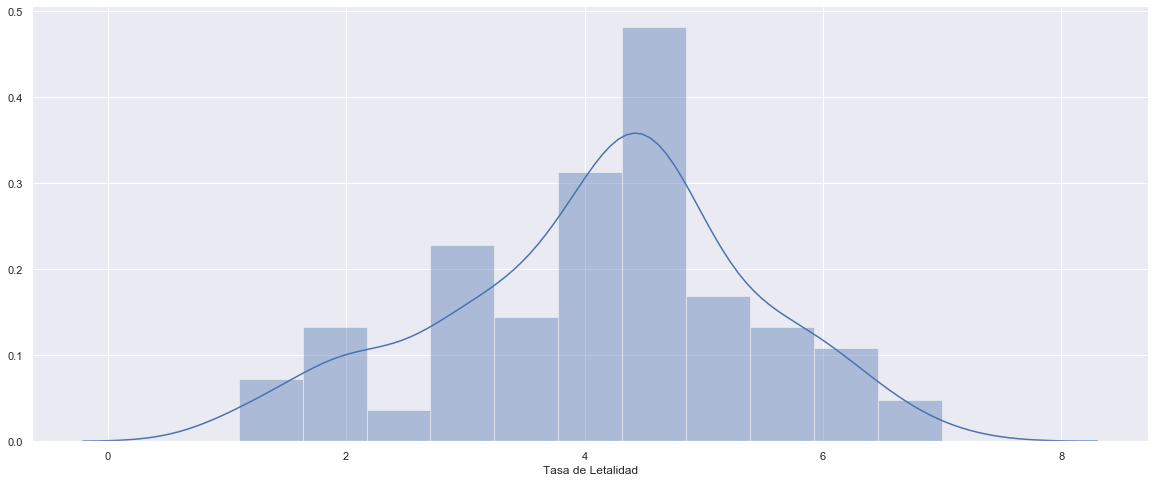

In [63]:
fig = plt.figure(figsize = (20,8))
sns.distplot(data_without_outliers2['Tasa de Letalidad'])

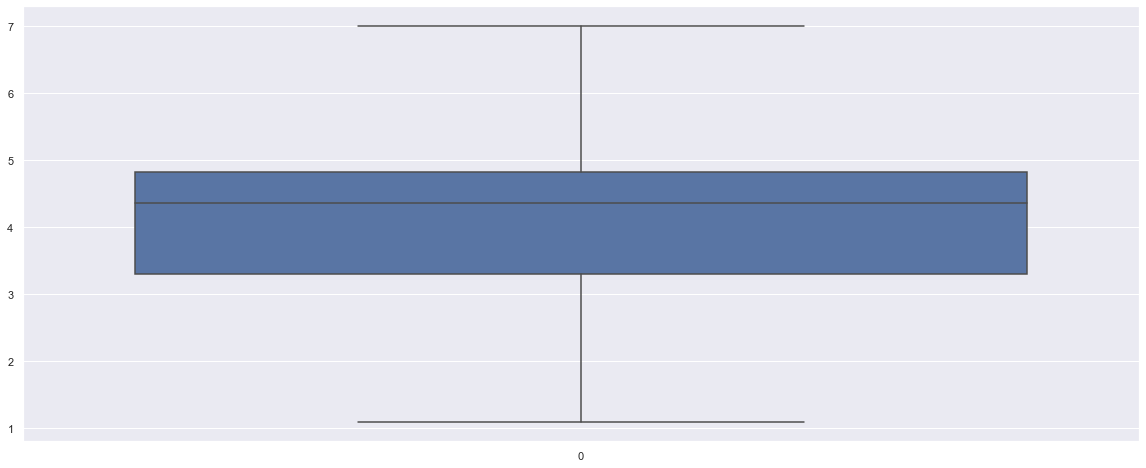

In [64]:
fig = plt.figure(figsize = (20,8))
sns.boxplot(data = data_without_outliers2['Tasa de Letalidad'])

#### De la misma manera que hemos hecho con la variable 'Densidad' hemos reemplazado su mediana por el outlier que quedaba, de esta manera podemos decir que tenemos una data homogénea y con una distribución normal para poder entrenar el modelo.

In [65]:
data_without_outliers3


,País,Población,Densidad,Esperanza de vida,PIB p.Cap,Gasto Edu.p.Cap.,Gasto Salud p.Cap.,Índice Corrup.,Emis.CO2 p.cap.,Decesos,Casos confirmados,Decesos x Mill.,Continente,Decesos x 100K,Casos x 100K,Tasa de Letalidad
0,Afganistan,17.431,4.043,64.490,6.103,3.135,1.099,16.000,-1.238,1481.000,40026.000,39.840,ASIA,3,107,3.700
1,Albania,14.861,4.595,78.900,8.472,4.860,5.124,36.000,0.495,439.000,16212.000,154.250,EUROPA,15,569,2.708
2,Alemania,18.236,5.451,81.000,10.630,7.612,8.318,80.000,2.214,9739.000,352107.000,117.100,EUROPA,11,423,2.766
4,Angola,17.243,3.219,60.780,7.976,4.828,3.850,19.000,-0.020,228.000,7096.000,7.400,AFRICA,0,23,3.213
6,Arabia Saudita,17.333,2.773,75.000,9.953,6.943,6.555,49.000,2.925,5127.000,341062.000,152.140,ASIA,15,1012,1.503
7,Argelia,17.559,2.890,76.690,8.156,5.366,5.017,35.000,1.371,1827.000,53777.000,43.260,AFRICA,4,127,3.397
8,Argentina,17.612,2.773,76.520,9.108,6.681,6.744,40.000,1.548,25342.000,949063.000,568.720,AMERICA,56,2129,2.670
9,Armenia,14.901,4.605,76.700,8.175,4.654,3.871,35.000,0.678,1046.000,59995.000,353.410,EUROPA,35,2027,1.743
10,Australia,17.041,1.099,82.750,10.828,7.916,8.054,77.000,2.820,904.000,27371.000,35.920,OCEANIA,3,108,3.303
11,Austria,16.002,4.663,81.800,10.713,7.816,8.167,76.000,2.099,877.000,60224.000,98.530,EUROPA,9,676,1.456


In [66]:
data_cleaned = data_without_outliers3.copy()

# Chequeamos las  OLS assumptions

#### Voy a establecer 3 variables dependientes posibles, a ver cual de ellas tiene una correlacion mas fuerte con los predictores.

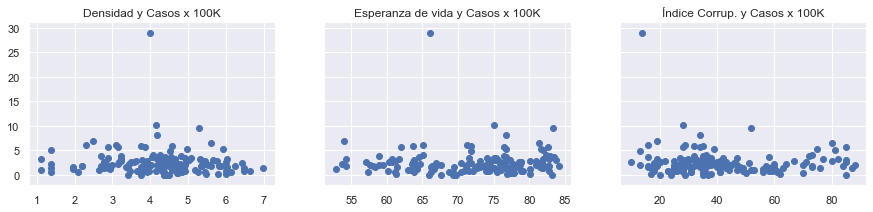

In [67]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Densidad'],data_cleaned['Tasa de Letalidad'])
ax1.set_title('Densidad y Casos x 100K')
ax2.scatter(data_cleaned['Esperanza de vida'],data_cleaned['Tasa de Letalidad'])
ax2.set_title('Esperanza de vida y Casos x 100K')
ax3.scatter(data_cleaned['Índice Corrup.'],data_cleaned['Tasa de Letalidad'])
ax3.set_title('Índice Corrup. y Casos x 100K')


plt.show()

### Vemos que  'Casos x 100K' tiende levemente a una correlación positiva, vamos a aplicar una transformación logarítmica a las 3 variables dependientes.

In [68]:
Log_CasosX100K = np.log(data_cleaned['Casos x 100K'])
data_cleaned['Log_CasosX100K'] = Log_CasosX100K


C:\Users\engel\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [69]:
Log_Decesos = np.log(data_cleaned['Decesos'])
data_cleaned['Log_Decesos'] = Log_Decesos


In [70]:
Log_DecesosX100K = np.log(data_cleaned['Decesos x 100K'])
data_cleaned['Log_DecesosX100K'] = Log_DecesosX100K

In [71]:
Log_TasaLetalidad = np.log(data_cleaned['Tasa de Letalidad'])
data_cleaned['Log_TasaLetalidad'] = Log_TasaLetalidad

Text(0.5, 1.0, 'Índice Corrup. y Log_CasosX100K')

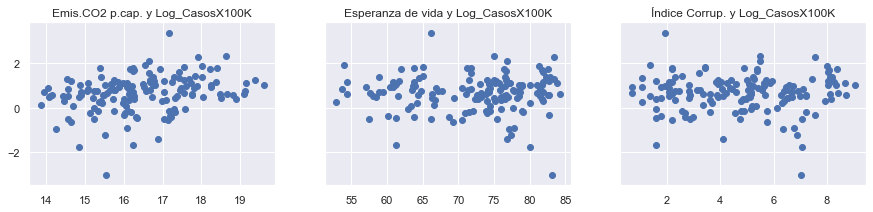

In [72]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Población'],data_cleaned['Log_TasaLetalidad'])
ax1.set_title('Emis.CO2 p.cap. y Log_CasosX100K')
ax2.scatter(data_cleaned['Esperanza de vida'],data_cleaned['Log_TasaLetalidad'])
ax2.set_title('Esperanza de vida y Log_CasosX100K')
ax3.scatter(data_cleaned['Gasto Salud p.Cap.'],data_cleaned['Log_TasaLetalidad'])
ax3.set_title('Índice Corrup. y Log_CasosX100K')


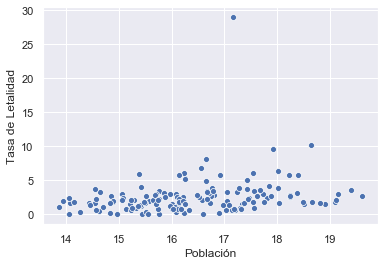

In [73]:
sns.set(color_codes=True)
ax = sns.scatterplot(data_cleaned['Población'],data_cleaned['Tasa de Letalidad'])
plt.show()

### Con la transformación logarítmica vemos como la correlación se hace más fuerte. Ahora vamos a ver cuál de las 3 variables dependientes tiene mayor correlación con los regresores en la siguiente tabla y mapa de calor:

In [74]:
data_cleaned.columns


Index(['País', 'Población', 'Densidad', 'Esperanza de vida', 'PIB p.Cap',
       'Gasto Edu.p.Cap.', 'Gasto Salud p.Cap.', 'Índice Corrup.',
       'Emis.CO2 p.cap.', 'Decesos', 'Casos confirmados', 'Decesos x Mill.',
       'Continente', 'Decesos x 100K', 'Casos x 100K', 'Tasa de Letalidad',
       'Log_CasosX100K', 'Log_Decesos', 'Log_DecesosX100K',
       'Log_TasaLetalidad'],
      dtype='object')

In [75]:
dfcorr = data_cleaned[['País', 'Población', 'Densidad', 'Esperanza de vida', 'PIB p.Cap',
       'Gasto Edu.p.Cap.', 'Gasto Salud p.Cap.', 'Índice Corrup.',
       'Emis.CO2 p.cap.', 'Tasa de Letalidad','Log_TasaLetalidad','Decesos x 100K', 'Log_DecesosX100K', 'Log_CasosX100K']]



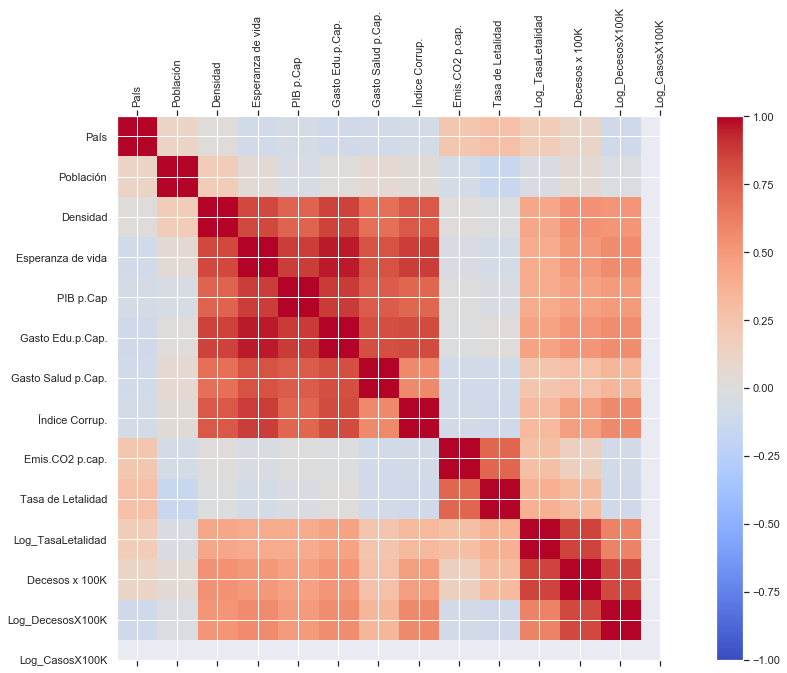

In [76]:
data = dfcorr
corr = data.corr()
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

### También lo podemos ver de la siguiente manera:

In [77]:
datacorr2 = data_cleaned[['País', 'Población', 'Densidad', 'Esperanza de vida', 'PIB p.Cap',
       'Gasto Edu.p.Cap.', 'Gasto Salud p.Cap.', 'Índice Corrup.',
       'Emis.CO2 p.cap.', 'Decesos', 'Casos confirmados', 'Decesos x Mill.',
       'Continente','Log_Decesos','Log_CasosX100K', 'Log_TasaLetalidad', 'Log_DecesosX100K']]
tablaCorrelation = datacorr2.corr(method='pearson')

In [78]:
tablaCorrelation

,Población,Densidad,Esperanza de vida,PIB p.Cap,Gasto Edu.p.Cap.,Gasto Salud p.Cap.,Índice Corrup.,Emis.CO2 p.cap.,Decesos,Casos confirmados,Decesos x Mill.,Log_Decesos,Log_CasosX100K,Log_TasaLetalidad,Log_DecesosX100K
Población,1.000,0.118,0.023,-0.078,-0.056,-0.094,-0.090,-0.068,0.386,0.303,0.182,0.529,-0.100,0.281,0.110
Densidad,0.118,1.000,0.186,0.047,-0.053,0.018,0.067,0.024,-0.019,0.012,-0.037,0.032,-0.029,-0.134,0.045
Esperanza de vida,0.023,0.186,1.000,0.834,0.731,0.857,0.680,0.777,0.159,0.109,0.425,0.430,0.522,-0.009,0.532
PIB p.Cap,-0.078,0.047,0.834,1.000,0.872,0.960,0.801,0.872,0.190,0.136,0.404,0.360,0.570,-0.066,0.507
Gasto Edu.p.Cap.,-0.056,-0.053,0.731,0.872,1.000,0.877,0.764,0.723,0.191,0.126,0.400,0.314,0.488,-0.035,0.455
Gasto Salud p.Cap.,-0.094,0.018,0.857,0.960,0.877,1.000,0.811,0.828,0.212,0.145,0.452,0.376,0.561,0.009,0.523
Índice Corrup.,-0.090,0.067,0.680,0.801,0.764,0.811,1.000,0.578,0.111,0.092,0.239,0.154,0.337,-0.089,0.279
Emis.CO2 p.cap.,-0.068,0.024,0.777,0.872,0.723,0.828,0.578,1.000,0.165,0.141,0.324,0.385,0.576,-0.098,0.474
Decesos,0.386,-0.019,0.159,0.190,0.191,0.212,0.111,0.165,1.000,0.932,0.505,0.562,0.272,0.191,0.381
Casos confirmados,0.303,0.012,0.109,0.136,0.126,0.145,0.092,0.141,0.932,1.000,0.348,0.490,0.241,0.077,0.271


#### Podemos ver claramente cómo los casos confirmados cada 100.000 habitantes (Log_CasosX100K) es la que mas correlación fuerte tiene con las algunas variables independientes. Así que nos quedaremos con esta variable dependiente para nuestro modelo.

# Multicolinealidad

#### Voy a analizar la multicolineadlidad entre las variables independientes, y descartar alguna si es necesario.

In [79]:
data_cleaned.columns.values

array(['País', 'Población', 'Densidad', 'Esperanza de vida', 'PIB p.Cap',
       'Gasto Edu.p.Cap.', 'Gasto Salud p.Cap.', 'Índice Corrup.',
       'Emis.CO2 p.cap.', 'Decesos', 'Casos confirmados',
       'Decesos x Mill.', 'Continente', 'Decesos x 100K', 'Casos x 100K',
       'Tasa de Letalidad', 'Log_CasosX100K', 'Log_Decesos',
       'Log_DecesosX100K', 'Log_TasaLetalidad'], dtype=object)

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


variables = data_cleaned[['Población', 'Densidad', 'Esperanza de vida', 'PIB p.Cap',
       'Gasto Edu.p.Cap.', 'Gasto Salud p.Cap.', 'Índice Corrup.',
       'Emis.CO2 p.cap.']]

#### Voy a crear un dataframe con todas las VIFs (Variance inflation factor)

In [81]:
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [82]:
vif

,VIF,Features
0,149.409,Población
1,15.709,Densidad
2,268.161,Esperanza de vida
3,369.148,PIB p.Cap
4,74.081,Gasto Edu.p.Cap.
5,73.322,Gasto Salud p.Cap.
6,20.112,Índice Corrup.
7,4.347,Emis.CO2 p.cap.


#### Observo que PIB p.cap y Esperanza de vida son las que tienen el VIF mas alto así que decido descartarlas para el modelo. Esto hará que las VIF de las otras variables también bajen.


In [83]:
#data_no_multicollinearity = data_cleaned.drop(['PIB p.Cap','Esperanza de vida','País'],axis=1)
data_no_multicollinearity = data_cleaned.drop(['País','PIB p.Cap'],axis=1)

In [84]:
variables_non_multicollinearity = data_no_multicollinearity[['Población', 'Densidad','Esperanza de vida','Gasto Edu.p.Cap.', 'Gasto Salud p.Cap.', 'Índice Corrup.',
       'Emis.CO2 p.cap.']]

In [85]:
vif_non_multicollinearity = pd.DataFrame()
vif_non_multicollinearity["VIF"] = [variance_inflation_factor(variables_non_multicollinearity.values, i) for i in range(variables_non_multicollinearity.shape[1])]
vif_non_multicollinearity["Features"] = variables_non_multicollinearity.columns

In [86]:
vif_non_multicollinearity

,VIF,Features
0,126.097,Población
1,15.663,Densidad
2,212.556,Esperanza de vida
3,67.165,Gasto Edu.p.Cap.
4,63.546,Gasto Salud p.Cap.
5,19.338,Índice Corrup.
6,3.924,Emis.CO2 p.cap.


## Variables Dummies

#### Para poder incorporar las variables categóricas al modelo, tengo que crear las dummies. Hay una función muy útil para esto, get_dummies(). Siempre debemos descartar una de las dummies para no crear multicolinealidad.

In [87]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [88]:
data_with_dummies.head()

,Población,Densidad,Esperanza de vida,Gasto Edu.p.Cap.,Gasto Salud p.Cap.,Índice Corrup.,Emis.CO2 p.cap.,Decesos,Casos confirmados,Decesos x Mill.,...,Casos x 100K,Tasa de Letalidad,Log_CasosX100K,Log_Decesos,Log_DecesosX100K,Log_TasaLetalidad,Continente_AMERICA,Continente_ASIA,Continente_EUROPA,Continente_OCEANIA
0,17.431,4.043,64.490,3.135,1.099,16.000,-1.238,1481.000,40026.000,39.840,...,107,3.700,4.673,7.300,1.099,1.308,0,1,0,0
1,14.861,4.595,78.900,4.860,5.124,36.000,0.495,439.000,16212.000,154.250,...,569,2.708,6.344,6.084,2.708,0.996,0,0,1,0
2,18.236,5.451,81.000,7.612,8.318,80.000,2.214,9739.000,352107.000,117.100,...,423,2.766,6.047,9.184,2.398,1.017,0,0,1,0
4,17.243,3.219,60.780,4.828,3.850,19.000,-0.020,228.000,7096.000,7.400,...,23,3.213,3.135,5.429,-inf,1.167,0,0,0,0
6,17.333,2.773,75.000,6.943,6.555,49.000,2.925,5127.000,341062.000,152.140,...,1012,1.503,6.920,8.542,2.708,0.408,0,1,0,0


## Reordenando el dataset

#### Primero pondré la variable dependiente, luego las independientes numéricas,  y luego las dummies.

In [89]:
data_with_dummies.columns.values

array(['Población', 'Densidad', 'Esperanza de vida', 'Gasto Edu.p.Cap.',
       'Gasto Salud p.Cap.', 'Índice Corrup.', 'Emis.CO2 p.cap.',
       'Decesos', 'Casos confirmados', 'Decesos x Mill.',
       'Decesos x 100K', 'Casos x 100K', 'Tasa de Letalidad',
       'Log_CasosX100K', 'Log_Decesos', 'Log_DecesosX100K',
       'Log_TasaLetalidad', 'Continente_AMERICA', 'Continente_ASIA',
       'Continente_EUROPA', 'Continente_OCEANIA'], dtype=object)

In [90]:
#cols_dp = ['Log_CasosX100K', 'Población', 'Esperanza de vida', 'Gasto Salud p.Cap.', 'Índice Corrup.', 'Emis.CO2 p.cap.','Continente_AMERICA','Continente_ASIA', 'Continente_EUROPA', 'Continente_OCEANIA']
cols_dp = ['Log_TasaLetalidad', 'Población', 'Esperanza de vida', 'Gasto Salud p.Cap.', 'Índice Corrup.', 'Emis.CO2 p.cap.','Continente_AMERICA','Continente_ASIA', 'Continente_EUROPA', 'Continente_OCEANIA']


In [91]:
data_preprocessed = data_with_dummies[cols_dp]
data_preprocessed

,Log_TasaLetalidad,Población,Esperanza de vida,Gasto Salud p.Cap.,Índice Corrup.,Emis.CO2 p.cap.,Continente_AMERICA,Continente_ASIA,Continente_EUROPA,Continente_OCEANIA
0,1.308,17.431,64.490,1.099,16.000,-1.238,0,1,0,0
1,0.996,14.861,78.900,5.124,36.000,0.495,0,0,1,0
2,1.017,18.236,81.000,8.318,80.000,2.214,0,0,1,0
4,1.167,17.243,60.780,3.850,19.000,-0.020,0,0,0,0
6,0.408,17.333,75.000,6.555,49.000,2.925,0,1,0,0
7,1.223,17.559,76.690,5.017,35.000,1.371,0,0,0,0
8,0.982,17.612,76.520,6.744,40.000,1.548,1,0,0,0
9,0.556,14.901,76.700,3.871,35.000,0.678,0,0,1,0
10,1.195,17.041,82.750,8.054,77.000,2.820,0,0,0,1
11,0.376,16.002,81.800,8.167,76.000,2.099,0,0,1,0


# Modelo de regresión lineal multiple

## Declaración de inputs y targets:

In [92]:
target = data_preprocessed['Log_TasaLetalidad']

inputs = data_preprocessed.drop(['Log_TasaLetalidad'],axis=1)

In [93]:
inputs.dtypes

Población             float64
Esperanza de vida     float64
Gasto Salud p.Cap.    float64
Índice Corrup.        float64
Emis.CO2 p.cap.       float64
Continente_AMERICA      uint8
Continente_ASIA         uint8
Continente_EUROPA       uint8
Continente_OCEANIA      uint8
dtype: object

## Escalando la data

In [94]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(inputs)

StandardScaler()

In [95]:
inputs_scaled = scaler.transform(inputs)

In [96]:
inputs_scaled = np.around(inputs_scaled, 2)

In [97]:
from sklearn.model_selection import train_test_split

#### Repartimos la data entre un 80% para el entrenamiento del modelo y un 20% para el test. Para tener siempre el mismo tipo de split (repartición), utilizamos siempre el mismo random_state()


In [98]:
#x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.2, random_state=365)
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.2, random_state= 365)

In [99]:
y_train = y_train.replace([np.inf, -np.inf],0)

In [100]:
y_test = y_test.replace([np.inf, -np.inf],0)

In [141]:
y_train

0      0.62
1      0.28
2      0.49
3      0.68
4      0.63
5      0.57
6     -0.17
7      0.95
8      0.58
9      0.79
10    -0.41
11     1.07
12     1.05
13     0.78
14    -0.16
15     0.94
16    -0.25
17     1.08
18     0.24
19    -0.19
20    -0.37
21     1.81
22     0.88
23    -0.67
24     1.38
25     0.50
26    -0.06
27     0.29
28     0.38
29     0.94
30     1.75
31     1.68
32     1.00
33     0.07
34     0.75
35     1.74
36    -0.18
37     0.82
38     0.78
39     0.42
40     1.36
41     0.38
42    -0.01
43     0.00
44     0.55
45     2.32
46     0.50
47     0.78
48    -1.39
49     1.21
50     1.65
51     1.74
52     1.02
53    -0.50
54     1.11
55     1.31
56     0.56
57     0.42
58     1.86
59     0.98
60     1.76
61     1.79
62     0.72
63     0.67
64    -1.67
65     1.28
66     1.02
67     0.22
68     0.99
69     3.37
70    -0.90
71     1.18
72     0.67
73     1.09
74     0.36
75     0.48
76     0.83
77     0.38
78     1.00
79     0.86
80     1.14
81     0.60
82     1.15
83  

# Creando la Regresión

In [101]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [102]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)

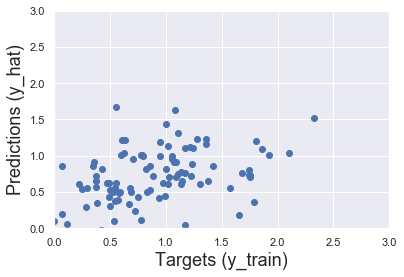

In [103]:
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(0,3)
plt.ylim(0,3)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

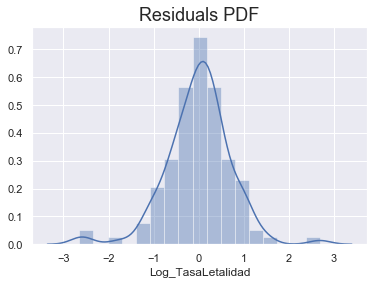

In [104]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed
# In our case we notice that there are many negative residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictions) are much higher than y_train (the targets)
# This is food for thought to improve our model

In [105]:
# Find the R-squared of the model
reg.score(x_train,y_train)

# Note that this is NOT the adjusted R-squared
# in other words... find the Adjusted R-squared to have the appropriate measure :)

0.24253823262620455

In [106]:
# Finding the weights and bias

In [107]:
# Obtain the bias (intercept) of the regression
reg.intercept_

0.6476840800560661

In [108]:
# Obtain the weights (coefficients) of the regression
reg.coef_

# Note that they are barely interpretable if at all


array([ 0.26262262, -0.11149761,  0.38658046, -0.29989973, -0.20611339,
        0.12500907, -0.08361834,  0.23845908,  0.06174124])

In [109]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Población,0.263
1,Esperanza de vida,-0.111
2,Gasto Salud p.Cap.,0.387
3,Índice Corrup.,-0.300
4,Emis.CO2 p.cap.,-0.206
5,Continente_AMERICA,0.125
6,Continente_ASIA,-0.084
7,Continente_EUROPA,0.238
8,Continente_OCEANIA,0.062


In [110]:
# testing

In [111]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Luckily we have prepared such a dataset
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_hat_test = reg.predict(x_test)

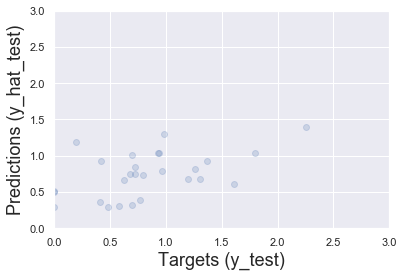

In [112]:
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(0,3)
plt.ylim(0,3)
plt.show()

In [113]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,2.108
1,2.828
2,2.094
3,2.185
4,1.667


In [114]:
# We can also include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = np.exp(y_test)


# Note that we have a lot of missing values
# There is no reason to have ANY missing values, though
# This suggests that something is wrong with the data frame / indexing

In [115]:
# After displaying y_test, we find what the issue is
# The old indexes are preserved (recall earlier in that code we made a note on that)
# The code was: data_cleaned = data_4.reset_index(drop=True)

# Therefore, to get a proper result, we must reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0   0.679
1   1.797
2   0.721
3   0.964
4   0.000
Name: Log_TasaLetalidad, dtype: float64

In [116]:
# Let's overwrite the 'Target' column with the appropriate values
# Again, we need the exponential of the test log price
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,2.108,1.973
1,2.828,6.034
2,2.094,2.057
3,2.185,2.622
4,1.667,1.000
5,1.979,3.303
6,1.473,2.149
7,0.659,0.172
8,1.952,1.863
9,2.800,2.562


In [117]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

In [118]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,2.108,1.973,-0.135,6.845
1,2.828,6.034,3.206,53.130
2,2.094,2.057,-0.037,1.794
3,2.185,2.622,0.438,16.690
4,1.667,1.000,-0.667,66.725
5,1.979,3.303,1.323,40.071
6,1.473,2.149,0.676,31.453
7,0.659,0.172,-0.487,282.438
8,1.952,1.863,-0.089,4.771
9,2.800,2.562,-0.237,9.270


In [119]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,31.000,31.000,31.000,31.000
mean,2.137,2.399,0.262,72.111
std,0.746,1.851,1.563,133.753
min,0.659,0.172,-2.111,1.794
25%,1.561,1.357,-0.589,14.598
50%,2.094,2.013,-0.089,35.776
75%,2.516,2.646,0.657,64.207
max,4.031,9.531,5.501,720.401


In [120]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
2,2.09,2.06,-0.04,1.79
19,1.44,1.50,0.07,4.46
8,1.95,1.86,-0.09,4.77
23,2.08,2.21,0.13,5.71
0,2.11,1.97,-0.14,6.84
9,2.80,2.56,-0.24,9.27
24,2.83,2.52,-0.31,12.43
16,2.32,2.06,-0.26,12.51
3,2.18,2.62,0.44,16.69
22,1.33,1.62,0.28,17.56


# Predicciones en toda la data

In [121]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Luckily we have prepared such a dataset
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_hat_train = reg.predict(x_train)

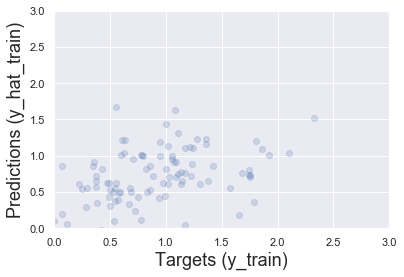

In [122]:
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_train, y_hat_train, alpha=0.2)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat_train)',size=18)
plt.xlim(0,3)
plt.ylim(0,3)
plt.show()

In [123]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
dfPredictions_Y_Hat_train = pd.DataFrame(np.exp(y_hat_train), columns=['Prediction'])
dfPredictions_Y_Hat_train


,Prediction
0,2.82
1,0.84
2,1.54
3,1.64
4,3.36
5,1.46
6,2.43
7,2.69
8,1.63
9,2.72


In [124]:
y_train = y_train.reset_index(drop=True)

# Check the result
y_train


0      0.62
1      0.28
2      0.49
3      0.68
4      0.63
5      0.57
6     -0.17
7      0.95
8      0.58
9      0.79
10    -0.41
11     1.07
12     1.05
13     0.78
14    -0.16
15     0.94
16    -0.25
17     1.08
18     0.24
19    -0.19
20    -0.37
21     1.81
22     0.88
23    -0.67
24     1.38
25     0.50
26    -0.06
27     0.29
28     0.38
29     0.94
30     1.75
31     1.68
32     1.00
33     0.07
34     0.75
35     1.74
36    -0.18
37     0.82
38     0.78
39     0.42
40     1.36
41     0.38
42    -0.01
43     0.00
44     0.55
45     2.32
46     0.50
47     0.78
48    -1.39
49     1.21
50     1.65
51     1.74
52     1.02
53    -0.50
54     1.11
55     1.31
56     0.56
57     0.42
58     1.86
59     0.98
60     1.76
61     1.79
62     0.72
63     0.67
64    -1.67
65     1.28
66     1.02
67     0.22
68     0.99
69     3.37
70    -0.90
71     1.18
72     0.67
73     1.09
74     0.36
75     0.48
76     0.83
77     0.38
78     1.00
79     0.86
80     1.14
81     0.60
82     1.15
83  

In [125]:
#dfPredictions_Y_Hat_train['Target'] = np.exp(y_train)
dfPredictions_Y_Hat_train['Target'] = data_without_nans['Decesos x 100K']

In [126]:
dfPredictions_Y_Hat_train

,Prediction,Target
0,2.82,3.00
1,0.84,15.00
2,1.54,11.00
3,1.64,nan
4,3.36,0.00
5,1.46,nan
6,2.43,15.00
7,2.69,4.00
8,1.63,56.00
9,2.72,35.00


In [127]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
dfPredictions_Y_Hat_train['Residual'] = dfPredictions_Y_Hat_train['Target'] - dfPredictions_Y_Hat_train['Prediction']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

In [128]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
dfPredictions_Y_Hat_train['Difference%'] = np.absolute(dfPredictions_Y_Hat_train['Residual']/dfPredictions_Y_Hat_train['Target']*100)
dfPredictions_Y_Hat_train

,Prediction,Target,Residual,Difference%
0,2.82,3.00,0.18,6.11
1,0.84,15.00,14.16,94.41
2,1.54,11.00,9.46,85.97
3,1.64,nan,nan,nan
4,3.36,0.00,-3.36,inf
5,1.46,nan,nan,nan
6,2.43,15.00,12.57,83.79
7,2.69,4.00,1.31,32.68
8,1.63,56.00,54.37,97.09
9,2.72,35.00,32.28,92.23


In [129]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
dfPredictions_Y_Hat_train.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
0,2.82,3.00,0.18,6.11
67,1.83,2.00,0.17,8.63
104,1.09,1.00,-0.09,8.70
78,2.26,2.00,-0.26,13.05
94,1.74,2.00,0.26,13.10
76,1.65,2.00,0.35,17.31
33,1.21,1.00,-0.21,21.30
70,0.78,1.00,0.22,21.82
62,1.27,1.00,-0.27,27.34
7,2.69,4.00,1.31,32.68


In [130]:
dfPredictions_Y_Hat_train.describe()

,Prediction,Target,Residual,Difference%
count,124.00,97.00,97.00,97.00
mean,2.05,15.39,13.32,inf
std,0.85,22.08,22.10,nan
min,0.60,0.00,-5.30,6.11
25%,1.45,1.00,-0.75,69.05
50%,1.87,6.00,3.56,88.46
75%,2.48,18.00,16.47,98.34
max,5.30,89.00,83.92,inf


In [131]:
# Find the R-squared of the model
reg.score(x_test,y_test)

0.3145525469824082

In [132]:
train_all_data = np.concatenate((x_train, x_test))

In [133]:
y_all_data = np.concatenate((y_train, y_test))

In [134]:
reg.score(train_all_data,y_all_data)

0.2562711726155883

# Test con la data Original